In [2]:
import pandas as pd

In [3]:
!ls sub43data/

sub-43_ses-01_task-RLbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-01_task-RLlearning_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-01_task-rest_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-leftbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-lefttransfer_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-rightbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv
sub-43_ses-02_task-rightlearning_run-1_space-fsLR_den-91k_bold_timeseries.tsv


2 sessions; left and right

In [4]:
baseline = pd.read_csv('sub43data/sub-43_ses-01_task-RLbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv', delimiter='\t')

In [9]:
baseline_left = pd.read_csv('sub43data/sub-43_ses-02_task-leftbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv', delimiter='\t')

In [ ]:
baseline_left.shape

(201, 998)

In [12]:
baseline_right = pd.read_csv('sub43data/sub-43_ses-02_task-rightbaseline_run-1_space-fsLR_den-91k_bold_timeseries.tsv', delimiter='\t')

In [6]:
baseline[:1].T.sample(5)

,0
7Networks_RH_SomMot_3,-0.318784
7Networks_LH_Default_pCunPCC_27,0.655232
7Networks_LH_DorsAttn_Post_32,-0.287756
7Networks_RH_Vis_25,2.532044
7Networks_RH_Cont_Par_3,-0.638532


In [29]:
node_names = baseline[:0].T.reset_index()

In [35]:
node_names[~node_names['index'].str.startswith('7Ne')]

,index


In [36]:
node_names[~node_names['index'].str.startswith('7Networks_R')].shape

(500, 1)

In [37]:
node_names[~node_names['index'].str.startswith('7Networks_L')].shape

(498, 1)

In [41]:
node_names[node_names['index'].str.startswith('7Networks_LH_DorsAttn_PrCv')]

,index
229,7Networks_LH_DorsAttn_PrCv_1
230,7Networks_LH_DorsAttn_PrCv_2
231,7Networks_LH_DorsAttn_PrCv_3
232,7Networks_LH_DorsAttn_PrCv_4


In [42]:
baseline

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_pCunPCC_11,7Networks_RH_Default_pCunPCC_12,7Networks_RH_Default_pCunPCC_13,7Networks_RH_Default_pCunPCC_14,7Networks_RH_Default_pCunPCC_15,7Networks_RH_Default_pCunPCC_16,7Networks_RH_Default_pCunPCC_17,7Networks_RH_Default_pCunPCC_18,7Networks_RH_Cont_pCun_2,7Networks_RH_Cont_pCun_4
0,1.426101,1.894554,0.201228,0.934306,-0.719173,1.862952,1.770194,-1.051675,-0.052146,1.937436,...,-0.105906,0.404949,0.154965,1.315908,2.106569,1.049609,0.880375,1.617281,0.552326,1.012995
1,0.987042,0.709333,-0.333374,-0.174620,-1.405659,1.401849,-0.041699,-1.695795,-0.020028,1.852793,...,-0.969248,-0.280748,-0.217879,0.388161,-0.391417,-0.449851,-0.697848,-0.607093,-0.540475,-0.328749
2,0.898949,-0.280639,-0.555696,-1.077322,-1.804169,0.943675,-1.057008,-2.015780,-0.196367,1.585644,...,-1.470856,-0.817994,-0.417104,-0.370660,-1.790307,-1.377391,-1.449576,-1.671114,-1.169890,-1.043530
3,1.193234,-0.721210,-0.242093,-1.432626,-1.684359,0.669252,-1.110382,-1.650742,-0.534842,1.292074,...,-1.310635,-1.037374,-0.361897,-0.810234,-1.677856,-1.457524,-1.124837,-1.327585,-1.044244,-0.948039
4,1.578545,-0.315702,0.554474,-1.034153,-1.059829,0.761852,-0.633313,-0.569117,-0.821442,1.213028,...,-0.501737,-0.820150,-0.084855,-0.860794,-0.494103,-0.859157,-0.224065,-0.321957,-0.248317,-0.358914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,-0.056728,-1.299437,-0.492261,-1.353995,-0.668154,-0.326271,-1.496279,-0.350578,-1.011852,-0.140495,...,-0.363986,-1.520063,-2.288574,-1.654971,-1.052532,-2.203994,-2.549042,-2.576638,-1.866505,-2.310875
215,0.425614,-1.421723,-0.879061,-1.400200,-0.597759,-0.424635,-1.899306,0.041662,-1.599040,-0.652906,...,-0.644511,-1.388642,-2.149299,-1.479005,-0.749794,-1.483356,-1.665527,-2.169778,-1.573040,-1.777966
216,1.050846,-1.315409,-1.376497,-1.337356,-0.530706,-0.242520,-1.989317,0.347756,-1.944201,-0.894120,...,-0.721676,-1.212696,-2.036523,-1.255161,-0.443996,-0.912112,-1.073910,-1.859929,-1.289536,-1.276632
217,1.371740,-1.352251,-1.724804,-1.387442,-0.341539,-0.161482,-1.684996,0.124635,-1.842586,-0.924894,...,-0.362605,-1.081808,-1.838314,-0.968935,-0.217650,-0.551126,-0.850155,-1.957295,-1.105514,-0.884769


In [50]:
baseline.shape

(219, 998)

---

In [43]:
from brainspace.datasets import fetch_timeseries_preprocessing
timeseries = fetch_timeseries_preprocessing()

In [45]:
timeseries.shape

(20484, 652)

In [51]:
timeseries

array([[ 0.38489833,  0.3187041 ,  0.23683131, ..., -0.70282274,
        -0.89637637, -1.04487634],
       [ 1.54770565,  1.43604004,  1.30647731, ..., -0.61458343,
        -0.66761559, -0.69906276],
       [ 0.11876778,  0.13151444,  0.14419247, ..., -0.77522665,
        -0.87915206, -0.96425217],
       ...,
       [-0.03468982, -0.05691174, -0.07436354, ..., -0.08387705,
        -0.17883267, -0.27040225],
       [-0.04772457, -0.06023989, -0.07072676, ...,  0.14959452,
         0.11430258,  0.07727126],
       [-0.27146819, -0.26217654, -0.24896923, ...,  0.16807768,
         0.19636115,  0.2225235 ]])

In [52]:
import numpy as np

In [7]:
from brainspace.utils.parcellation import reduce_by_labels
from nilearn import datasets

/Users/qasem/.local/lib/python3.8/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [57]:

# Fetch surface atlas
atlas = datasets.fetch_atlas_surf_destrieux()
atlas

{'labels': [b'Unknown',
  b'G_and_S_frontomargin',
  b'G_and_S_occipital_inf',
  b'G_and_S_paracentral',
  b'G_and_S_subcentral',
  b'G_and_S_transv_frontopol',
  b'G_and_S_cingul-Ant',
  b'G_and_S_cingul-Mid-Ant',
  b'G_and_S_cingul-Mid-Post',
  b'G_cingul-Post-dorsal',
  b'G_cingul-Post-ventral',
  b'G_cuneus',
  b'G_front_inf-Opercular',
  b'G_front_inf-Orbital',
  b'G_front_inf-Triangul',
  b'G_front_middle',
  b'G_front_sup',
  b'G_Ins_lg_and_S_cent_ins',
  b'G_insular_short',
  b'G_occipital_middle',
  b'G_occipital_sup',
  b'G_oc-temp_lat-fusifor',
  b'G_oc-temp_med-Lingual',
  b'G_oc-temp_med-Parahip',
  b'G_orbital',
  b'G_pariet_inf-Angular',
  b'G_pariet_inf-Supramar',
  b'G_parietal_sup',
  b'G_postcentral',
  b'G_precentral',
  b'G_precuneus',
  b'G_rectus',
  b'G_subcallosal',
  b'G_temp_sup-G_T_transv',
  b'G_temp_sup-Lateral',
  b'G_temp_sup-Plan_polar',
  b'G_temp_sup-Plan_tempo',
  b'G_temporal_inf',
  b'G_temporal_middle',
  b'Lat_Fis-ant-Horizont',
  b'Lat_Fis-ant-V

In [58]:

# Remove non-cortex regions
regions = atlas['labels'].copy()
masked_regions = [b'Medial_wall', b'Unknown']
masked_labels = [regions.index(r) for r in masked_regions]
for r in masked_regions:
    regions.remove(r)


In [59]:

# Build Destrieux parcellation and mask
labeling = np.concatenate([atlas['map_left'], atlas['map_right']])
mask = ~np.isin(labeling, masked_labels)
mask


array([ True,  True,  True, ...,  True,  True,  True])

In [65]:
len(set(labeling))

75

In [61]:
mask.shape

(20484,)

In [62]:
(mask == True).sum()

18715

In [66]:
# # Distinct labels for left and right hemispheres
# lab_lh = atlas['map_left']
# labeling[lab_lh.size:] += lab_lh.max() + 1


In [67]:

# extract mean timeseries for each label
# seed_ts = reduce_by_labels(clean_ts[mask], labeling[mask], axis=1, red_op='mean')

NameError: name 'clean_ts' is not defined

In [8]:
baseline.T.values.shape

(998, 219)

In [73]:
# data = baseline.T.values

In [38]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure1000 = ConnectivityMeasure(kind='correlation')
correlation_matrix1000 = correlation_measure1000.fit_transform([baseline.values])[0]

<AxesSubplot:>

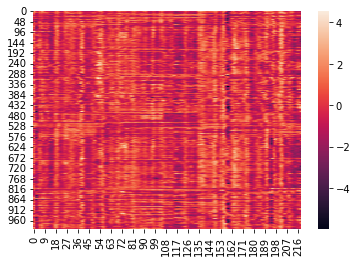

In [36]:
import seaborn as sns

sns.heatmap(
    baseline.T.values,
    )

<AxesSubplot:>

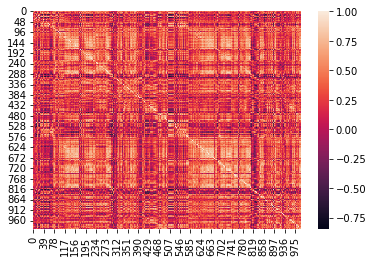

In [39]:
sns.heatmap(
    correlation_matrix1000
    )

In [93]:
baseline.values.shape

(219, 998)

<AxesSubplot:>

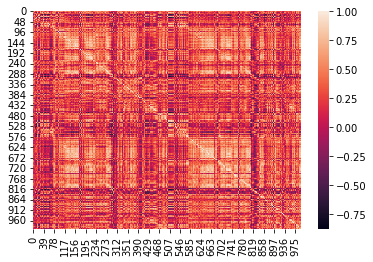

In [142]:
import numpy as np
np_conn_matrix = np.corrcoef(baseline.values.T)
sns.heatmap(
    np_conn_matrix
    )

---

dim reduction

In [14]:
baseline.T.reset_index().rename(columns={'index': 'i'})

,i,0,1,2,3,4,5,6,7,8,...,209,210,211,212,213,214,215,216,217,218
0,7Networks_LH_Vis_1,1.426101,0.987042,0.898949,1.193234,1.578545,1.744135,1.624523,1.358693,1.070147,...,1.270491,1.102776,0.795241,0.350659,-0.048211,-0.056728,0.425614,1.050846,1.371740,1.325468
1,7Networks_LH_Vis_2,1.894554,0.709333,-0.280639,-0.721210,-0.315702,0.754589,1.757592,1.937763,1.188212,...,0.281455,0.873118,0.927442,0.280031,-0.662606,-1.299437,-1.421723,-1.315409,-1.352251,-1.609103
2,7Networks_LH_Vis_3,0.201228,-0.333374,-0.555696,-0.242093,0.554474,1.404986,1.742794,1.326921,0.470642,...,0.076416,0.092732,-0.020832,-0.170974,-0.298407,-0.492261,-0.879061,-1.376497,-1.724804,-1.837730
3,7Networks_LH_Vis_4,0.934306,-0.174620,-1.077322,-1.432626,-1.034153,-0.194274,0.395122,0.323523,-0.146191,...,-0.154106,0.217878,0.233910,-0.276854,-0.953858,-1.353995,-1.400200,-1.337356,-1.387442,-1.564246
4,7Networks_LH_Vis_5,-0.719173,-1.405659,-1.804169,-1.684359,-1.059829,-0.315422,0.010610,-0.316937,-1.023071,...,-0.599163,-0.256579,-0.168900,-0.400805,-0.638336,-0.668154,-0.597759,-0.530706,-0.341539,0.047276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,7Networks_RH_Default_pCunPCC_16,1.049609,-0.449851,-1.377391,-1.457524,-0.859157,-0.091526,0.326179,0.208001,-0.206856,...,0.230686,-0.305275,-1.446392,-2.432942,-2.677020,-2.203994,-1.483356,-0.912112,-0.551126,-0.284360
994,7Networks_RH_Default_pCunPCC_17,0.880375,-0.697848,-1.449576,-1.124837,-0.224065,0.406989,0.283724,-0.338849,-0.795138,...,-0.040089,-0.827755,-2.216013,-3.225099,-3.271790,-2.549042,-1.665527,-1.073910,-0.850155,-0.838399
995,7Networks_RH_Default_pCunPCC_18,1.617281,-0.607093,-1.671114,-1.327585,-0.321957,0.372969,0.370297,-0.018731,-0.302543,...,-0.457739,-0.980940,-1.738523,-2.405866,-2.713071,-2.576638,-2.169778,-1.859929,-1.957295,-2.431896
996,7Networks_RH_Cont_pCun_2,0.552326,-0.540475,-1.169890,-1.044244,-0.248317,0.703557,1.179556,0.937510,0.298212,...,0.406369,0.118158,-0.614048,-1.420191,-1.886101,-1.866505,-1.573040,-1.289536,-1.105514,-0.970006


In [15]:
data = baseline.T.reset_index().rename(columns={'index': 'i'}).assign(parcel =
lambda row: row.i.str.split('_').str[:-1].str.join('_')
)

In [16]:
data[['i', 'parcel']]

,i,parcel
0,7Networks_LH_Vis_1,7Networks_LH_Vis
1,7Networks_LH_Vis_2,7Networks_LH_Vis
2,7Networks_LH_Vis_3,7Networks_LH_Vis
3,7Networks_LH_Vis_4,7Networks_LH_Vis
4,7Networks_LH_Vis_5,7Networks_LH_Vis
...,...,...
993,7Networks_RH_Default_pCunPCC_16,7Networks_RH_Default_pCunPCC
994,7Networks_RH_Default_pCunPCC_17,7Networks_RH_Default_pCunPCC
995,7Networks_RH_Default_pCunPCC_18,7Networks_RH_Default_pCunPCC
996,7Networks_RH_Cont_pCun_2,7Networks_RH_Cont_pCun


In [17]:
data.parcel.nunique()

50

In [18]:
data

,i,0,1,2,3,4,5,6,7,8,...,210,211,212,213,214,215,216,217,218,parcel
0,7Networks_LH_Vis_1,1.426101,0.987042,0.898949,1.193234,1.578545,1.744135,1.624523,1.358693,1.070147,...,1.102776,0.795241,0.350659,-0.048211,-0.056728,0.425614,1.050846,1.371740,1.325468,7Networks_LH_Vis
1,7Networks_LH_Vis_2,1.894554,0.709333,-0.280639,-0.721210,-0.315702,0.754589,1.757592,1.937763,1.188212,...,0.873118,0.927442,0.280031,-0.662606,-1.299437,-1.421723,-1.315409,-1.352251,-1.609103,7Networks_LH_Vis
2,7Networks_LH_Vis_3,0.201228,-0.333374,-0.555696,-0.242093,0.554474,1.404986,1.742794,1.326921,0.470642,...,0.092732,-0.020832,-0.170974,-0.298407,-0.492261,-0.879061,-1.376497,-1.724804,-1.837730,7Networks_LH_Vis
3,7Networks_LH_Vis_4,0.934306,-0.174620,-1.077322,-1.432626,-1.034153,-0.194274,0.395122,0.323523,-0.146191,...,0.217878,0.233910,-0.276854,-0.953858,-1.353995,-1.400200,-1.337356,-1.387442,-1.564246,7Networks_LH_Vis
4,7Networks_LH_Vis_5,-0.719173,-1.405659,-1.804169,-1.684359,-1.059829,-0.315422,0.010610,-0.316937,-1.023071,...,-0.256579,-0.168900,-0.400805,-0.638336,-0.668154,-0.597759,-0.530706,-0.341539,0.047276,7Networks_LH_Vis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,7Networks_RH_Default_pCunPCC_16,1.049609,-0.449851,-1.377391,-1.457524,-0.859157,-0.091526,0.326179,0.208001,-0.206856,...,-0.305275,-1.446392,-2.432942,-2.677020,-2.203994,-1.483356,-0.912112,-0.551126,-0.284360,7Networks_RH_Default_pCunPCC
994,7Networks_RH_Default_pCunPCC_17,0.880375,-0.697848,-1.449576,-1.124837,-0.224065,0.406989,0.283724,-0.338849,-0.795138,...,-0.827755,-2.216013,-3.225099,-3.271790,-2.549042,-1.665527,-1.073910,-0.850155,-0.838399,7Networks_RH_Default_pCunPCC
995,7Networks_RH_Default_pCunPCC_18,1.617281,-0.607093,-1.671114,-1.327585,-0.321957,0.372969,0.370297,-0.018731,-0.302543,...,-0.980940,-1.738523,-2.405866,-2.713071,-2.576638,-2.169778,-1.859929,-1.957295,-2.431896,7Networks_RH_Default_pCunPCC
996,7Networks_RH_Cont_pCun_2,0.552326,-0.540475,-1.169890,-1.044244,-0.248317,0.703557,1.179556,0.937510,0.298212,...,0.118158,-0.614048,-1.420191,-1.886101,-1.866505,-1.573040,-1.289536,-1.105514,-0.970006,7Networks_RH_Cont_pCun


In [19]:
data.groupby('parcel').mean()

,0,1,2,3,4,5,6,7,8,9,...,209,210,211,212,213,214,215,216,217,218
parcel,,,,,,,,,,,,,,,,,,,,,
7Networks_LH_Cont_Cing,0.766558,0.195467,-0.283715,-0.525475,-0.415737,-0.032091,0.334192,0.391826,0.114386,-0.251986,...,-0.517251,-0.402455,-0.425829,-0.653941,-0.982084,-1.168331,-1.080153,-0.870880,-0.818030,-0.990111
7Networks_LH_Cont_OFC,-0.155723,-1.501683,-1.982009,-1.366134,-0.180536,0.787403,1.120264,0.952959,0.675508,0.556486,...,0.135905,1.005085,1.427234,1.028319,0.320243,0.112181,0.602297,1.192214,1.191807,0.564381
7Networks_LH_Cont_PFCd,1.743019,-0.090607,-1.133467,-1.199835,-0.790109,-0.591520,-0.863136,-1.283144,-1.371722,-1.009277,...,0.014070,-0.448556,-1.277962,-1.990506,-2.312366,-2.184277,-1.711212,-1.175934,-0.894593,-0.912614
7Networks_LH_Cont_PFCl,1.367512,0.505402,-0.127331,-0.351351,-0.141133,0.315413,0.717509,0.853849,0.727130,0.493583,...,0.234084,0.195923,-0.162830,-0.712955,-1.105523,-0.989927,-0.367901,0.315011,0.560619,0.331478
7Networks_LH_Cont_PFCmp,1.083211,-0.926766,-2.035782,-2.043124,-1.472942,-0.983619,-0.823634,-0.822625,-0.780707,-0.756506,...,0.582170,0.000007,-1.048909,-1.968155,-2.332997,-2.059698,-1.397491,-0.774282,-0.510320,-0.582514
7Networks_LH_Cont_PFCv,0.780040,-0.732958,-1.354092,-0.890647,0.102344,0.887499,1.114613,0.909879,0.561567,0.224009,...,1.221702,0.920995,-0.220673,-1.562940,-2.160179,-1.436754,0.259753,1.797178,2.167641,1.426355
7Networks_LH_Cont_Par,0.619957,-0.227780,-0.835052,-0.996947,-0.655108,-0.007543,0.557207,0.732361,0.528820,0.202979,...,0.565999,0.326319,-0.450372,-1.367639,-1.827072,-1.541529,-0.769944,-0.054952,0.238714,0.164300
7Networks_LH_Cont_Temp,2.609378,1.663154,0.917758,0.553893,0.634191,1.033722,1.502049,1.798458,1.807361,1.587259,...,1.339947,1.521955,1.428733,0.968314,0.404476,0.185576,0.476177,0.940806,1.102147,0.875765
7Networks_LH_Cont_pCun,1.922171,-0.780419,-2.129439,-1.772310,-0.463384,0.694339,1.069833,0.740304,0.181072,-0.189621,...,-0.075718,-0.566499,-1.150362,-1.549572,-1.631711,-1.469538,-1.222750,-0.964765,-0.657793,-0.283456


In [20]:
data = data.groupby('parcel').mean()

<AxesSubplot:>

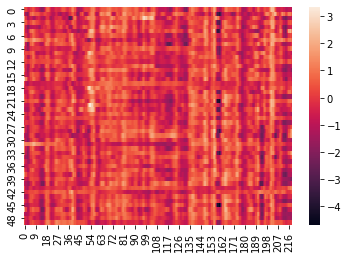

In [21]:
sns.heatmap(
    data.values,
    )

In [27]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([data.T.values])[0]

<AxesSubplot:>

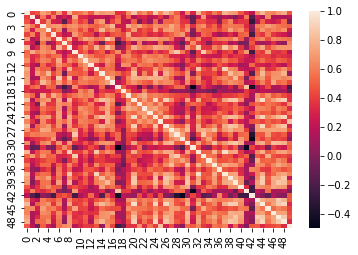

In [28]:
sns.heatmap(
    correlation_matrix
    )

check out the nilearn data labels

 Retrieve the atlas and the data¶
 


In [40]:
from brainspace.gradient import GradientMaps

gm = GradientMaps(n_components=2, random_state=0)
gm.fit(correlation_matrix1000)

/Users/qasem/opt/anaconda3/envs/nienv/lib/python3.8/site-packages/brainspace/gradient/embedding.py:70: UserWarning: Affinity is not symmetric. Making symmetric.
  warnings.warn('Affinity is not symmetric. Making symmetric.')


GradientMaps(n_components=2, random_state=0)

In [44]:
gm.gradients_.shape

(998, 2)

In [48]:
baseline[:0].T

""
7Networks_LH_Vis_1
7Networks_LH_Vis_2
7Networks_LH_Vis_3
7Networks_LH_Vis_4
7Networks_LH_Vis_5
...
7Networks_RH_Default_pCunPCC_16
7Networks_RH_Default_pCunPCC_17
7Networks_RH_Default_pCunPCC_18
7Networks_RH_Cont_pCun_2


In [50]:
from nilearn.datasets import fetch_atlas_schaefer_2018

atlas = fetch_atlas_schaefer_2018(n_rois=1000, resolution_mm=2)

atlas['labels'].shape
labels = [x.decode() for x in atlas['labels']]

In [58]:
import matplotlib.pyplot as plt

In [59]:
baseline

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_pCunPCC_11,7Networks_RH_Default_pCunPCC_12,7Networks_RH_Default_pCunPCC_13,7Networks_RH_Default_pCunPCC_14,7Networks_RH_Default_pCunPCC_15,7Networks_RH_Default_pCunPCC_16,7Networks_RH_Default_pCunPCC_17,7Networks_RH_Default_pCunPCC_18,7Networks_RH_Cont_pCun_2,7Networks_RH_Cont_pCun_4
0,1.426101,1.894554,0.201228,0.934306,-0.719173,1.862952,1.770194,-1.051675,-0.052146,1.937436,...,-0.105906,0.404949,0.154965,1.315908,2.106569,1.049609,0.880375,1.617281,0.552326,1.012995
1,0.987042,0.709333,-0.333374,-0.174620,-1.405659,1.401849,-0.041699,-1.695795,-0.020028,1.852793,...,-0.969248,-0.280748,-0.217879,0.388161,-0.391417,-0.449851,-0.697848,-0.607093,-0.540475,-0.328749
2,0.898949,-0.280639,-0.555696,-1.077322,-1.804169,0.943675,-1.057008,-2.015780,-0.196367,1.585644,...,-1.470856,-0.817994,-0.417104,-0.370660,-1.790307,-1.377391,-1.449576,-1.671114,-1.169890,-1.043530
3,1.193234,-0.721210,-0.242093,-1.432626,-1.684359,0.669252,-1.110382,-1.650742,-0.534842,1.292074,...,-1.310635,-1.037374,-0.361897,-0.810234,-1.677856,-1.457524,-1.124837,-1.327585,-1.044244,-0.948039
4,1.578545,-0.315702,0.554474,-1.034153,-1.059829,0.761852,-0.633313,-0.569117,-0.821442,1.213028,...,-0.501737,-0.820150,-0.084855,-0.860794,-0.494103,-0.859157,-0.224065,-0.321957,-0.248317,-0.358914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,-0.056728,-1.299437,-0.492261,-1.353995,-0.668154,-0.326271,-1.496279,-0.350578,-1.011852,-0.140495,...,-0.363986,-1.520063,-2.288574,-1.654971,-1.052532,-2.203994,-2.549042,-2.576638,-1.866505,-2.310875
215,0.425614,-1.421723,-0.879061,-1.400200,-0.597759,-0.424635,-1.899306,0.041662,-1.599040,-0.652906,...,-0.644511,-1.388642,-2.149299,-1.479005,-0.749794,-1.483356,-1.665527,-2.169778,-1.573040,-1.777966
216,1.050846,-1.315409,-1.376497,-1.337356,-0.530706,-0.242520,-1.989317,0.347756,-1.944201,-0.894120,...,-0.721676,-1.212696,-2.036523,-1.255161,-0.443996,-0.912112,-1.073910,-1.859929,-1.289536,-1.276632
217,1.371740,-1.352251,-1.724804,-1.387442,-0.341539,-0.161482,-1.684996,0.124635,-1.842586,-0.924894,...,-0.362605,-1.081808,-1.838314,-0.968935,-0.217650,-0.551126,-0.850155,-1.957295,-1.105514,-0.884769


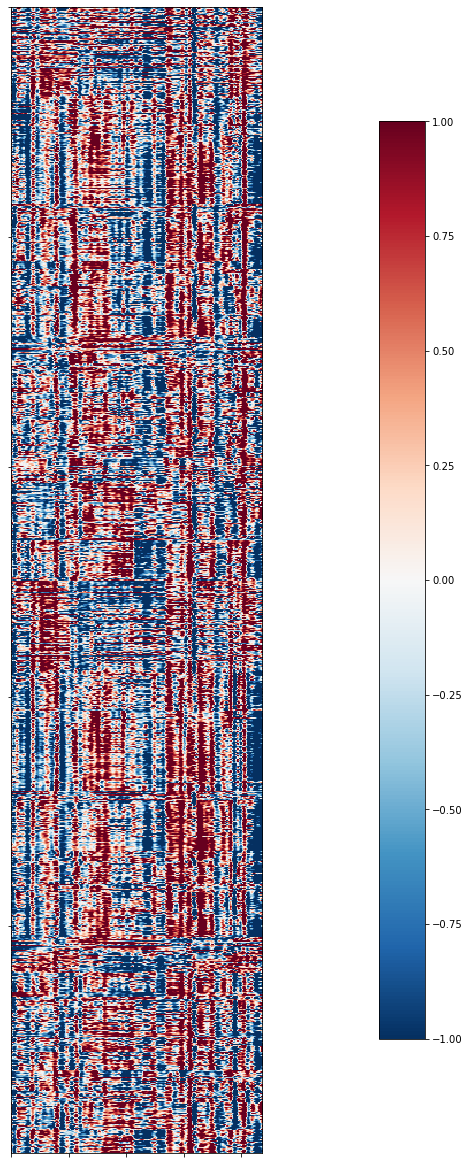

In [63]:
from nilearn import plotting, input_data

# cmat = np.loadtxt('connectivity.csv', delimiter=',')
cmat = baseline.values.T

fig, ax = plt.subplots(figsize=(16, 16))
plotting.plot_matrix(cmat, vmax=1, vmin=-1, figure=fig);

<AxesSubplot:>

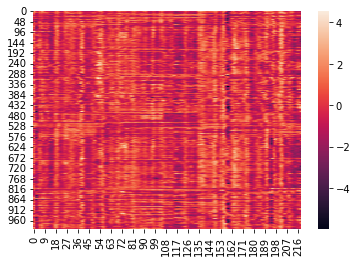

In [62]:
sns.heatmap(baseline.values.T)

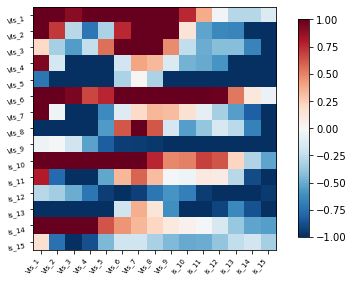

In [66]:
A = cmat[:15, :15]
region_labels = [x[-5:] for x in labels[:15]]

fig, ax = plt.subplots(figsize=(5, 5))
plotting.plot_matrix(A, vmax=1, vmin=-1, labels=region_labels, figure=fig);

<AxesSubplot:>

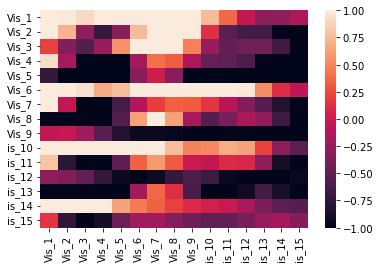

In [69]:
sns.heatmap(A, vmax=1, vmin=-1, 
xticklabels=region_labels,
yticklabels=region_labels,
)

/Users/qasem/.local/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


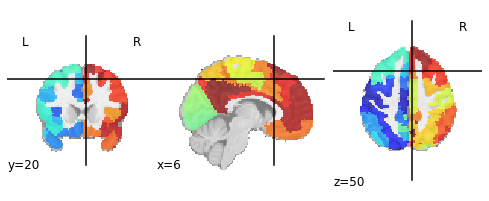

In [71]:
import nibabel as nib

atlas_img = nib.load(atlas['maps'])

plotting.plot_roi(atlas_img, cmap='jet', cut_coords=[6, 20, 50])


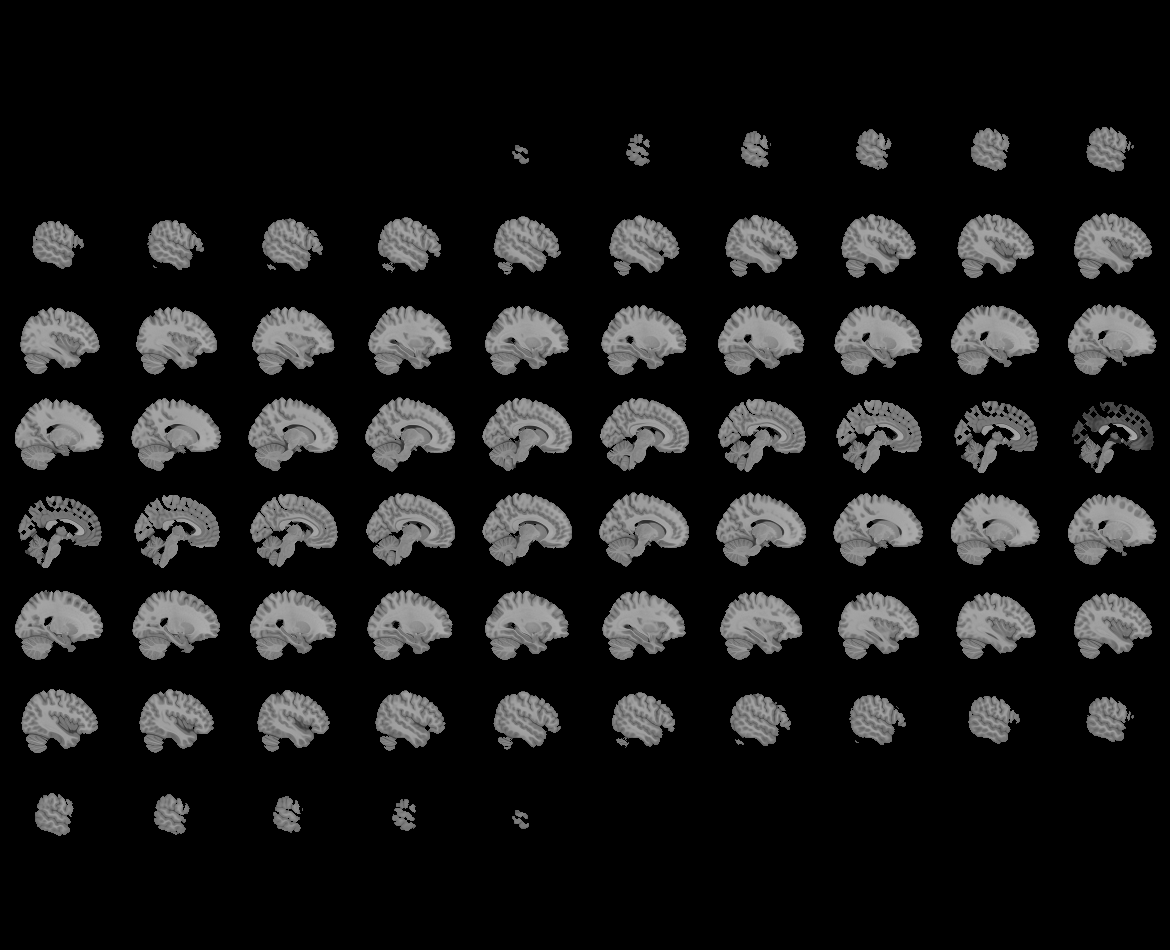
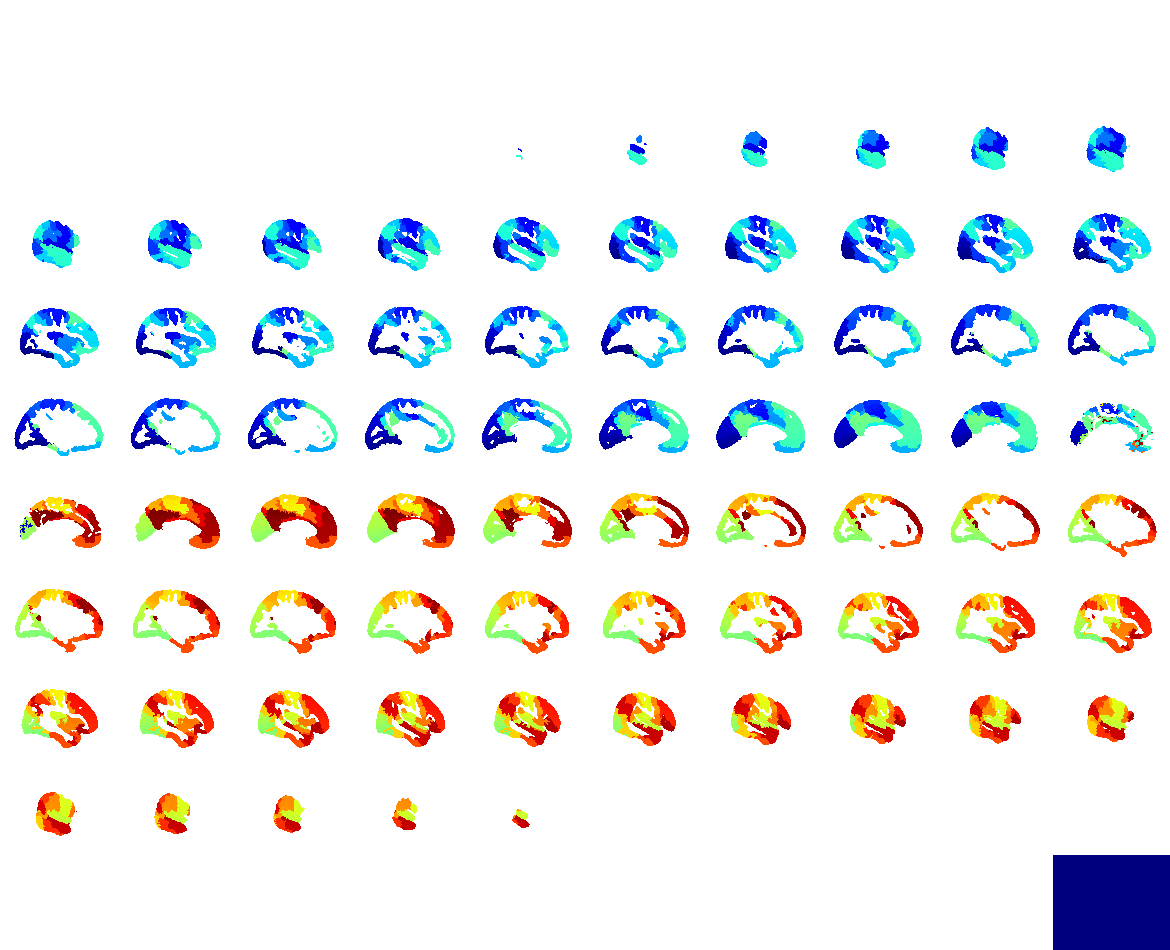

In [73]:
plotting.view_img(atlas_img, cmap='jet', symmetric_cmap=False)

In [75]:
from nilearn import image

In [82]:
vis_img = image.math_img("np.where(np.isin(img, np.arange(1, 10)), img, 0)", img=atlas_img)
vis_img

In [89]:
img_task = datasets.fetch_localizer_button_task()['tmap']
img_task

'/Users/qasem/nilearn_data/brainomics_localizer/brainomics_data/S02/tmaps_LeftAuditory&VisualClickVsRightAuditory&VisualClick.nii.gz'


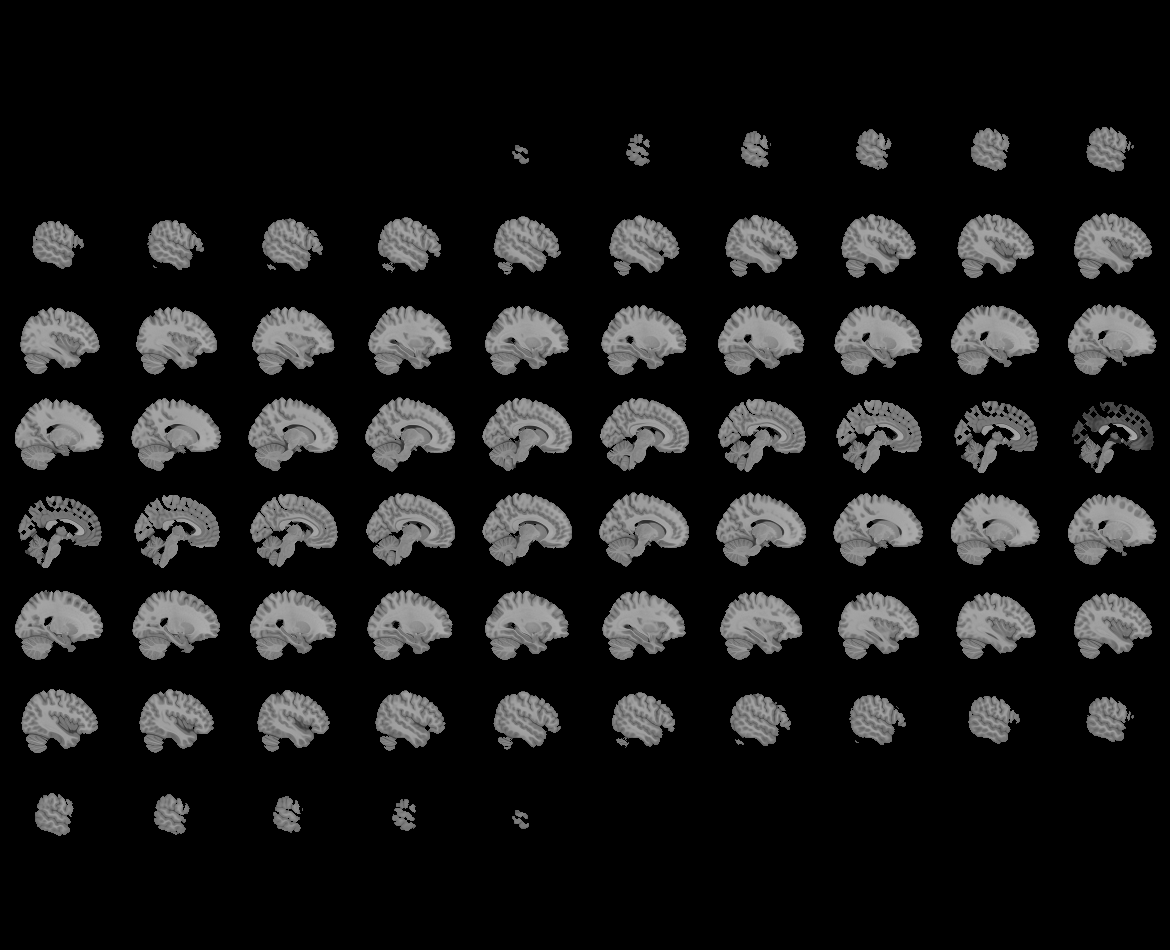
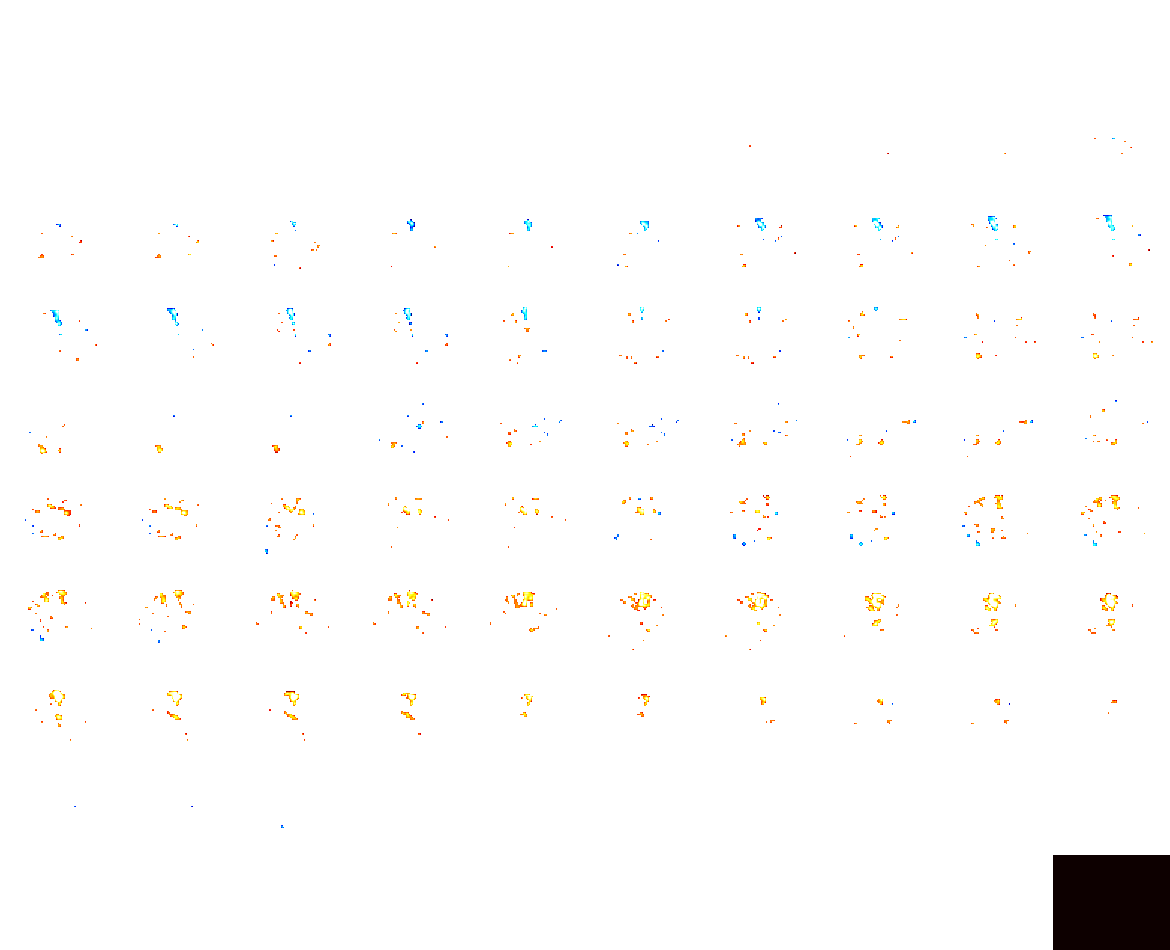

In [91]:
plotting.view_img(img_task, threshold=2, vmax=4, title="Motor contrast")

In [86]:
# vis_img = image.math_img("np.log(img)", img=atlas_img)
# vis_img

In [ ]:
baseline.shape

(219, 998)

In [103]:
from brainspace.utils.parcellation import map_to_labels
grad = map_to_labels(gm.gradients_[:, 0], surf_labels, mask=mask, fill=np.nan)

IndexError: index 998 is out of bounds for axis 0 with size 998

In [120]:
len(set(surf_labels))

1001

In [130]:
data_nodes = set(baseline[:0].T.reset_index()['index'].tolist())

In [131]:
atlas_nodes = set(labels)

In [132]:
data_nodes ^ atlas_nodes

{'7Networks_RH_Cont_Cing_1', '7Networks_RH_Vis_33'}

In [ ]:
# gonna remove these guys from data

In [134]:
atlas_nodes - data_nodes

{'7Networks_RH_Cont_Cing_1', '7Networks_RH_Vis_33'}

https://brainspace.readthedocs.io/en/latest/python_doc/auto_examples/plot_tutorial0.html#sphx-glr-python-doc-auto-examples-plot-tutorial0-py

In [139]:
# Remove REGIONS
# regions = atlas['labels'].copy()
masked_regions = [b'7Networks_RH_Cont_Cing_1', b'7Networks_RH_Vis_33']


In [140]:
regions = atlas['labels']
regions.shape

(1000,)

In [141]:
masked_labels = [regions.index(r) for r in masked_regions]
for r in masked_regions:
    regions.remove(r)

# Build Destrieux parcellation and mask
labeling = np.concatenate([atlas['map_left'], atlas['map_right']])
mask = ~np.isin(labeling, masked_labels)

AttributeError: 'numpy.ndarray' object has no attribute 'index'